In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as si
import yfinance as yf
import os

In [2]:
Apple = yf.download("AAPL", start="2019-10-31", end="2020-10-31")

[*********************100%***********************]  1 of 1 completed


# Calculating Option Value

In [3]:

def euro_option_bsm(S, K, T, r, q, vol, payoff):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: risk free rate
    #q: continuous dividend yield
    #vol: volatility of underlying asset
    #payoff: call or put
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        option_value = S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        option_value =  - S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) + K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return option_value

In [4]:
euro_option_bsm(108.67, 110, 1, 0.09, 0.0067, 0.46, 'call')

22.889976341926534

In [5]:
S = np.linspace(60,160,11)
Call = np.zeros((len(S),1))
Put = np.zeros((len(S),1))
for i in range(len(S)):
    Call [i] = euro_option_bsm(S[i], 110, 1, 0.09, 0.0067, 0.46, 'call')

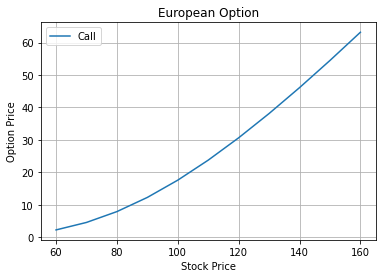

In [6]:
fig = plt.figure()
plt.plot(S, Call, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Option Price')
plt.title('European Option')
plt.legend(['Call'])

# Calculating Delta

In [8]:
def delta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        delta = np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0)
    elif payoff == "put":
        delta =  - np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0)
    
    return delta

In [9]:
delta(108.67, 110, 1, 0.09, 0.0067, 0.46, 'call')

0.6454099639606716

In [10]:
delta(108.67, 110, 1, 0.09, 0.0067, 0.46, 'put')

-0.34791243099601227

In [41]:
Sd = np.linspace(30,160,11)
Delta_Call = np.zeros((len(Sd),1))
Delta_Put = np.zeros((len(Sd),1))
for i in range(len(Sd)):
    Delta_Call [i] = delta(Sd[i], 110, 1, 0.09, 0.0067, 0.46, 'call' )
    Delta_Put [i] = delta(Sd[i], 110, 1, 0.09, 0.0067, 0.46, 'put' )

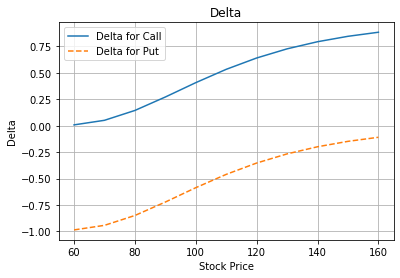

In [42]:

fig = plt.figure()
plt.plot(S, Delta_Call, '-')
plt.plot(S, Delta_Put, '--')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Delta')
plt.title('Delta')
plt.legend(['Delta for Call','Delta for Put'])

# Gamma

In [13]:
def gamma(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    gamma = np.exp(-r * T) * si.norm.pdf(d1, 0.0, 1.0) / (vol * S * T)
    
    return gamma

In [14]:
gamma(108.67, 110, 1, 0.09, 0.0067, 0.46, 'call')

0.006773750801029643

In [15]:
gamma(108.67, 110, 1, 0.09, 0.0067, 0.46, 'put')

0.006773750801029643

In [18]:
Sg = np.linspace(30,160,11)
Gamma = np.zeros((len(Sg),1))
for i in range(len(Sg)):
    Gamma [i] = gamma(Sg[i], 110, 1, 0.09, 0.0067, 0.46, 'call')


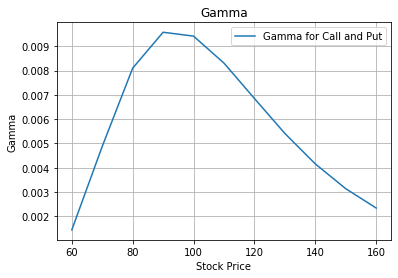

In [19]:
fig = plt.figure()
plt.plot(S, Gamma, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Gamma')
plt.title('Gamma')
plt.legend(['Gamma for Call and Put'])

# Speed

In [20]:
def speed(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    speed = np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / ((vol **2) * (S**2) * T) * (d1 + vol * np.sqrt(T))
    
    return speed

In [21]:
speed(108.67, 110, 1, 0.09, 0.0067, 0.46, 'call')

0.00012439737349830587

In [23]:
speed(108.67, 110, 1, 0.09, 0.0067, 0.46, 'put')

0.00012439737349830587

In [27]:
Ss = np.linspace(30,160,11)
Speed = np.zeros((len(Ss),1))
for i in range(len(Ss)):
    Speed [i] = speed(Ss[i], 110, 1, 0.09, 0.0067, 0.46, 'call')

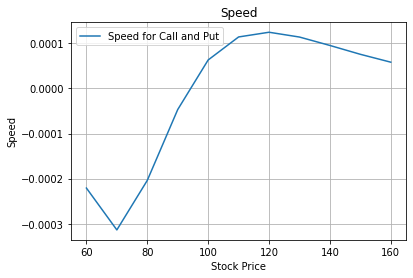

In [28]:
fig = plt.figure()
plt.plot(S, Speed, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Speed')
plt.title('Speed')
plt.legend(['Speed for Call and Put'])

# Calculating Theta

In [29]:
def theta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        theta = vol * S * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        theta = vol * S * np.exp(-q * T) * si.norm.pdf(-d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return theta

In [30]:
theta(108.67, 110, 1, 0.09, 0.0067, 0.46, 'call')

12.980660843552187

In [31]:
theta(108.67, 110, 1, 0.09, 0.0067, 0.46, 'put')

13.740773859513713

In [44]:
#how much the value of theta will change to the option price from 1 month to 1 week!!!!!
(1/12 -1/52) *theta(108.67, 110, 1, 0.09, 0.0067, 0.46, 'call')

0.8320936438174478

In [45]:
#the T is from 1 quarter.25 to 3 years

Tt = np.linspace(0.25,3,12)
Theta_Call = np.zeros((len(Tt),1))
Theta_Put = np.zeros((len(Tt),1))
for i in range(len(Tt)):
    Theta_Call [i] = theta(108.67, 110, Tt[i], 0.09, 0.0067, 0.46, 'call')
    Theta_Put [i] = theta(108.67, 110, Tt[i], 0.09, 0.0067, 0.46, 'put')

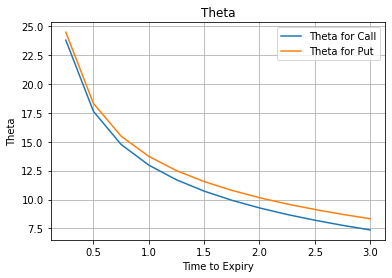

In [46]:
fig = plt.figure()
plt.plot(Tt, Theta_Call, '-')
plt.plot(Tt, Theta_Put, '-')
plt.grid()
plt.xlabel('Time to Expiry')
plt.ylabel('Theta')
plt.title('Theta')
plt.legend(['Theta for Call', 'Theta for Put'])

# Rho
Rho, 𝜌, measures sensitivity to the interest rate: it is the derivative of the option value with respect to the risk free interest rate (for the relevant term)

In [47]:
def rho(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        rho =  K * T * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        rho = - K * T * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return rho

In [48]:
rho(108.67, 110, 1, 0.09, 0.0067, 0.46, 'call')

47.24672444167965

In [49]:
rho(108.67, 110, 1, 0.09, 0.0067, 0.46, 'put')

-53.28570593815545

In [56]:
#this is the risk free rate jumping from 0 to 10% which very high
r = np.linspace(0,0.1,11)
Rho_Call = np.zeros((len(r),1))
Rho_Put = np.zeros((len(r),1))
for i in range(len(r)):
    Rho_Call [i] = rho(108.67, 110, 1, r[i], 0.0067, 0.46, 'call')
    Rho_Put [i] = rho(108.67, 110, 1, r[i], 0.0067, 0.46, 'put')

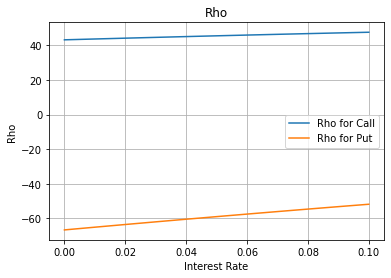

In [57]:
fig = plt.figure()
plt.plot(r, Rho_Call, '-')
plt.plot(r, Rho_Put, '-')
plt.grid()
plt.xlabel('Interest Rate')
plt.ylabel('Rho')
plt.title('Rho')
plt.legend(['Rho for Call', 'Rho for Put'])

# Vega
Sensisitivity to volatility - derivative of option value with respect to underlying asset volatility

In [73]:
def vega(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    vega = S * np.sqrt(T) * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0)
    
    return vega

In [74]:
vega(108.67, 110, 1, 0.09, 0.0067, 0.46, 'call')

39.992919735005124

In [75]:
vega(108.67, 110, 1, 0.09, 0.0067, 0.46, 'put')
#call and put will be positive and same as its volatility in both directives.

39.992919735005124

In [55]:
# if the volatility is high, the option value will increase. And avery good risk assessor. 
#Vega will provide a reference whether to trade/not trade an option.
#More volatility insinuates more uncertainty. 
#option is isomorphic to insurance. Hence, volatility becomes is most important in that risk model. 

In [84]:
#Vol change here is from 10% to 40%, which is normal
vol = np.linspace(0.1,0.4,13)
Vega = np.zeros((len(vol),1))
for i in range(len(vol)):
    Vega [i] = vega(108.67, 110, 1, 0.09, 0.0067, vol[i], 'call')

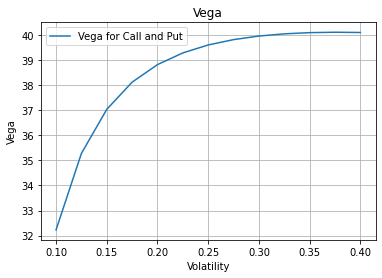

In [85]:
fig = plt.figure()
plt.plot(vol, Vega, '-')
plt.grid()
plt.xlabel('Volatility')
plt.ylabel('Vega')
plt.title('Vega')
plt.legend(['Vega for Call and Put'])

In [86]:
0.01* vega(108.67, 110, 1, 0.09, 0.0067, 0.46, 'call')

0.3999291973500512

In [87]:
# ^ MEANS THAT A 1% CHANGE IN VOLOATILITY CAUSES THE OPTION ( CALL/PUT) PRICE TO INCREASE BY $ 0.39

In [88]:
#most important greek a trader will look at

# Surface of Greeks

# Delta Surface

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as si
from mpl_toolkits.mplot3d import Axes3D


In [90]:
def delta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        delta = np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0)
    elif payoff == "put":
        delta =  - np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0)
    
    return delta

In [91]:
Ssd = np.linspace(60, 160, 51)
Tsd = np.linspace(0.5, 2, 51)
Delta = np.zeros((len(Tsd),len(Ssd)))
for j in range(len(Ssd)):
    for i in range(len(Tsd)):
        Delta[i,j] = delta(Ssd[j], 110, Tsd[i], 0.09, 0.0067, 0.46, 'call')

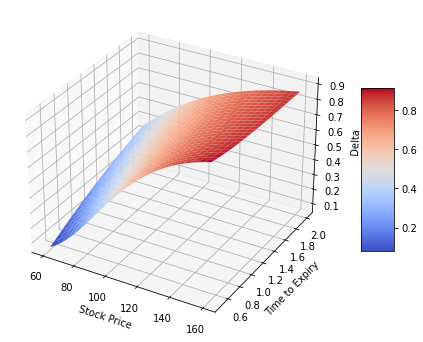

In [92]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
Ssd, Tsd = np.meshgrid(Ssd, Tsd)
surf = ax.plot_surface(Ssd, Tsd, Delta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Delta')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [93]:
da = delta(108.67, 110, 1, 0.09, 0.0067, 0.46, 'call')
print('The value of Delta is', da.round(4),'.','If the stock price increase 1 dollar, then the value of the option will increase $', da.round(4), '.')

The value of Delta is 0.6454 . If the stock price increase 1 dollar, then the value of the option will increase $ 0.6454 .


# Gamma Surface

In [94]:

def gamma(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    gamma = np.exp(-r * T) * si.norm.pdf(d1, 0.0, 1.0) / (vol * S * T)
    
    return gamma

In [95]:
Ssg = np.linspace(60, 160, 51)
Tsg = np.linspace(0.5, 2, 51)
Gamma = np.zeros((len(Tsg),len(Ssg)))
for j in range(len(Ssg)):
    for i in range(len(Tsg)):
        Gamma[i,j] = gamma(Ssg[j], 110, Tsg[i], 0.09, 0.0067, 0.46, 'call')

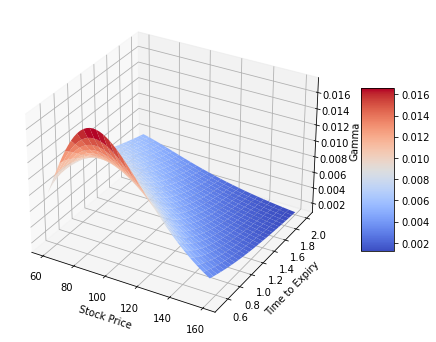

In [96]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
Ssg, Tsg = np.meshgrid(Ssg, Tsg)
surf = ax.plot_surface(Ssg, Tsg, Gamma, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Gamma')
fig.colorbar(surf, shrink=0.5, aspect=5);

# Speed Surface

In [97]:
def speed(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    speed = np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / ((vol **2) * (S**2) * T) * (d1 + vol * np.sqrt(T))
    
    return speed

In [98]:
Sss = np.linspace(60, 160, 51)
Tss = np.linspace(0.5, 2, 51)
Speed = np.zeros((len(Tss),len(Sss)))
for j in range(len(Sss)):
    for i in range(len(Tss)):
        Speed[i,j] = speed(Sss[j], 110, Tss[i], 0.09, 0.0067, 0.46, 'call')

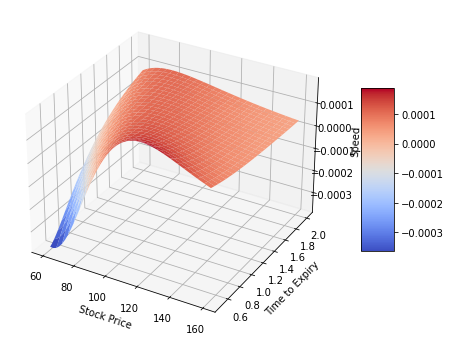

In [99]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
Sss, Tss = np.meshgrid(Sss, Tss)
surf = ax.plot_surface(Sss, Tss, Speed, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Speed')
fig.colorbar(surf, shrink=0.5, aspect=5);

# Theta Surface

In [101]:
def theta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        theta = - vol * S * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / (2 * T) + q * S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) - r * K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        theta = - vol * S * np.exp(-q * T) * si.norm.pdf(-d1, 0.0, 1.0) / (2 * T) + q * S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) - r * K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return theta

In [103]:
Sst = np.linspace(60, 160, 51)
Tst = np.linspace(0.5, 2, 51)
Theta = np.zeros((len(Tst),len(Sst)))
for j in range(len(Sst)):
    for i in range(len(Tst)):
        Theta[i,j] = theta(Sst[j], 110, Tst[i], 0.09, 0.0067, 0.46, 'call')

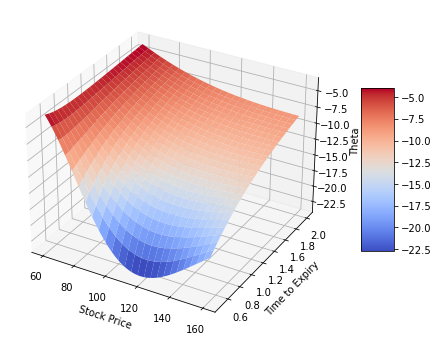

In [105]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
Sst, Tst = np.meshgrid(Sst, Tst)
surf = ax.plot_surface(Sst, Tst, Theta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Theta')
fig.colorbar(surf, shrink=0.5, aspect=5);


# Rho Surface

In [106]:
def rho(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        rho =  K * T * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        rho = - K * T * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return rho

In [108]:
Ssr = np.linspace(60, 160, 51)
Tsr = np.linspace(0.5, 2, 51)
Rho = np.zeros((len(Tsr),len(Ssr)))
for j in range(len(Ssr)):
    for i in range(len(Tsr)):
        Rho[i,j] = rho(Ssr[j], 110, Tsr[i], 0.09, 0.0067, 0.46, 'call')

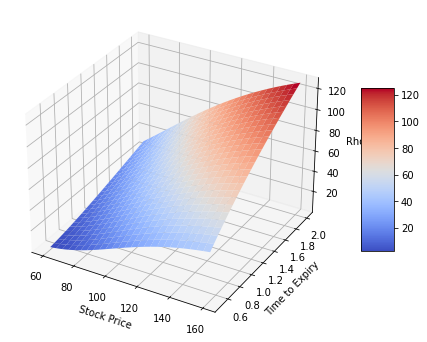

In [109]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
Ssr, Tsr = np.meshgrid(Ssr, Tsr)
surf = ax.plot_surface(Ssr, Tsr, Rho, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Rho')
fig.colorbar(surf, shrink=0.5, aspect=5);

# Vega Surface

In [110]:
def vega(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    vega = S * np.sqrt(T) * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0)
    
    return vega

In [111]:
Ssv = np.linspace(60, 160, 51)
Tsv = np.linspace(0.5, 2, 51)
Vega = np.zeros((len(Tsv),len(Ssv)))
for j in range(len(Ssv)):
    for i in range(len(Tsv)):
        Vega[i,j] = vega(Ssv[j], 105, Tsv[i], 0.04, 0.02, 0.3, 'call')

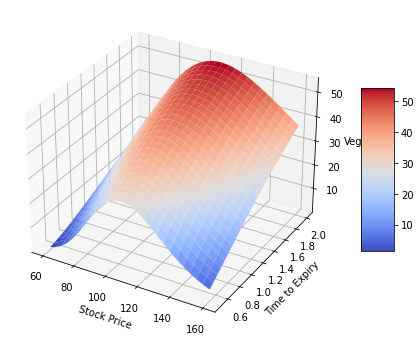

In [112]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
Ssv, Tsv = np.meshgrid(Ssv, Tsv)
surf = ax.plot_surface(Ssv, Tsv, Vega, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Vega')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [113]:
v = vega(108.67, 110, 1, 0.09, 0.0067, 0.46, 'call')
print('The value of Vega is', v.round(4),'.','If the volatility increases 1%, then the value of the option will increase $', v.round(4)*0.01, '.')

The value of Vega is 39.9929 . If the volatility increases 1%, then the value of the option will increase $ 0.399929 .


# *End of Greeks Analysis*